# Importing Libraries

In [ ]:
!pip install stable-baselines3[extra]

In [ ]:
!pip install swig

In [ ]:
!pip install 'gymnasium[box2d]'

In [ ]:
import gymnasium as gym
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_atari_env
import os
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback, CallbackList

# Test Environment

In [ ]:
gym.pprint_registry()

===== classic_control =====
Acrobot-v1             CartPole-v0            CartPole-v1
MountainCar-v0         MountainCarContinuous-v0 Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0     phys2d/CartPole-v1     phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3       BipedalWalkerHardcore-v3 CarRacing-v3
LunarLander-v3         LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1           CliffWalking-v1        CliffWalkingSlippery-v1
FrozenLake-v1          FrozenLake8x8-v1       Taxi-v3
===== tabular =====
tabular/Blackjack-v0   tabular/CliffWalking-v0
===== None =====
Ant-v2                 Ant-v3                 GymV21Environment-v0
GymV26Environment-v0   HalfCheetah-v2         HalfCheetah-v3
Hopper-v2              Hopper-v3              Humanoid-v2
Humanoid-v3            HumanoidStandup-v2     InvertedDoublePendulum-v2
InvertedPendulum-v2    Pusher-v2              Reacher-v2
Swimmer-v2             Swimmer-v3             Walker2d-v2
Walker2d-v3
===== mujoco =====
Ant-v4    

In [ ]:
environment_name = "CarRacing-v3"
env = gym.make(environment_name)
episodes = 5

In [ ]:
for episode in range(1, episodes+1):
    state, info = env.reset() # Updated env.reset to return two values
    done = False
    score = 0

    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, terminated, truncated, info = env.step(action) # Unpack 5 values
        done = terminated or truncated # Combine terminated and truncated for loop condition
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

/usr/local/lib/python3.12/dist-packages/gymnasium/envs/box2d/car_racing.py:592: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("CarRacing-v3", render_mode="rgb_array")
  gym.logger.warn(


Episode:1 Score:-26.199261992620098
Episode:2 Score:-35.5932203389836
Episode:3 Score:-31.159420289855365
Episode:4 Score:-36.50793650793711
Episode:5 Score:-33.333333333333734


In [ ]:
env.action_space.sample()

array([0.8244978, 0.9612945, 0.4454341], dtype=float32)

array([[[ 70, 132,  26],
        [ 49, 222, 228],
        [ 58, 204, 183],
        ...,
        [156, 221, 246],
        [135,  10, 217],
        [ 73, 188,  13]],

       [[152, 176, 178],
        [246,  71, 127],
        [ 45, 218,  98],
        ...,
        [ 89, 230, 130],
        [103,  31, 126],
        [155, 185, 116]],

       [[187,   3,  72],
        [  9, 224,  28],
        [120,  94,  71],
        ...,
        [177,  38,  68],
        [ 38, 154,  25],
        [ 77, 196, 215]],

       ...,

       [[  9, 166, 220],
        [ 34, 210, 101],
        [ 45, 173, 111],
        ...,
        [103, 212, 238],
        [218, 245, 115],
        [133, 217,  78]],

       [[ 92,  78, 151],
        [149, 158,  98],
        [144, 210, 243],
        ...,
        [191, 153,  33],
        [ 34, 235, 129],
        [ 59,  56,   0]],

       [[234,  47, 245],
        [140, 207,  88],
        [207,  19,  74],
        ...,
        [138, 217, 184],
        [128, 250,  95],
        [154, 124, 134]]], dtype=uint8)
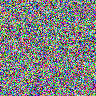

In [ ]:
env.observation_space.sample()

# Vectorise Environment and Train Model

In [ ]:
ENV_ID = 'CarRacing-v3'
LOG_PATH = os.path.join('Training', 'Logs', ENV_ID)
SAVE_PATH = os.path.join('Training', 'Saved Models')
MODEL_NAME = f'A2C_CarRacing_v3'
TOTAL_TIMESTEPS = 20000
EVAL_FREQ = 1000

In [ ]:
env = DummyVecEnv([lambda: gym.make(ENV_ID)])

model = A2C("CnnPolicy",
            env,
            verbose=1,
            tensorboard_log=LOG_PATH)


Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
checkpoint_cb = CheckpointCallback(
    save_freq=EVAL_FREQ,
    save_path=SAVE_PATH,
    name_prefix='a2c_checkpoint'
)

eval_env = DummyVecEnv([lambda: gym.make(ENV_ID, render_mode="rgb_array")])

eval_cb = EvalCallback(
    eval_env,
    best_model_save_path=os.path.join(SAVE_PATH, 'best_model'), # Where to save the BEST model
    log_path=LOG_PATH,
    eval_freq=EVAL_FREQ,
    deterministic=True,
    render=False,
    verbose=1
)

callbacks_list = CallbackList([checkpoint_cb, eval_cb])

In [ ]:
print(f"Starting training on {ENV_ID} for {TOTAL_TIMESTEPS} steps...")
model.learn(total_timesteps=TOTAL_TIMESTEPS, callback=callbacks_list)
print("Training finished.")

Starting training on CarRacing-v3 for 20000 steps...
Logging to Training/Logs/CarRacing-v3/A2C_3


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/callbacks.py:418: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.vec_transpose.VecTransposeImage object at 0x78425b6710a0> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x78425b671f10>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


------------------------------------
| time/                 |          |
|    fps                | 40       |
|    iterations         | 100      |
|    time_elapsed       | 12       |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -4.25    |
|    explained_variance | 0.0267   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.289    |
|    std                | 0.997    |
|    value_loss         | 0.00801  |
------------------------------------


/usr/local/lib/python3.12/dist-packages/stable_baselines3/common/evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=-93.42 +/- 0.10
Episode length: 1000.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 1e+03    |
|    mean_reward        | -93.4    |
| time/                 |          |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -4.24    |
|    explained_variance | 0.0396   |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 0.124    |
|    std                | 0.995    |
|    value_loss         | 0.00116  |
------------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 9    |
|    iterations      | 200  |
|    time_elapsed    | 104  |
|    total_timesteps | 1000 |
-----------------------------
------------------------------------
| time/                 |          |
|    fps                | 12       |
|    iteratio

# Save and Reload Model

In [ ]:
model.save(SAVE_PATH)
print(f"Model saved to: {SAVE_PATH}")

Model saved to: Training/Saved Models


In [ ]:
del model
del env

In [1]:
env_test = DummyVecEnv([lambda: gym.make(ENV_ID, render_mode="rgb_array")])
model = A2C.load(SAVE_PATH, env_test)

# Evaluate and Test

In [ ]:
print("\nEvaluating policy...")
mean_reward, std_reward = evaluate_policy(model, env_test, n_eval_episodes=5, render=False)
print(f"Mean reward over 5 episodes: {mean_reward:.2f} +/- {std_reward:.2f}")

In [ ]:
env_render = gym.make(ENV_ID, render_mode="human")
obs, info = env_render.reset()

print("\nStarting manual test run (close window to stop)...")
for step in range(2000): # Run for max 2000 steps
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, terminated, truncated, info = env_render.step(action)

    if terminated or truncated:
        obs, info = env_render.reset()

env_render.close()